# Classification and dimension reduction

In this assignment, we will apply dimension reduction techniques to reduce the data dimension, and then construct several classification models.

In [1]:
# import packages
# For data manipulation
import pandas as pd
import numpy as np

# For dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

# For classification models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split (5 pts)

Use 80% of the data to train the model and 20% of the data to test. (2 pts)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Question: Why do you need to do train_test split before your run dimension reduction algorithms? (3 pts)**

Answer: Performing train-test split before dimension reduction prevents data leakage by ensuring that the test data remains unseen during training. If you apply dimension reduction on the entire dataset first, information from the test set could influence the transformation, leading to biased results. By reducing dimensions only on the training set, you ensure a fair evaluation, with the transformation learned solely from training data and then applied to the test data for consistent comparison.

## Part 2: Dimension Reduction and visualization (25 pts)

The goal of this part is to implement PCA, kernel PCA and LLE for your training samples, and then visualize reduced training data samples in 2D-plane.

As we may know, the best dimension reduction technique depends on the task and your data. Therefore, we will try several methods and select the best one based on the visualization. Feel free to use any commands from sklearn.

#### Sample plots:

The sample plot is given here:
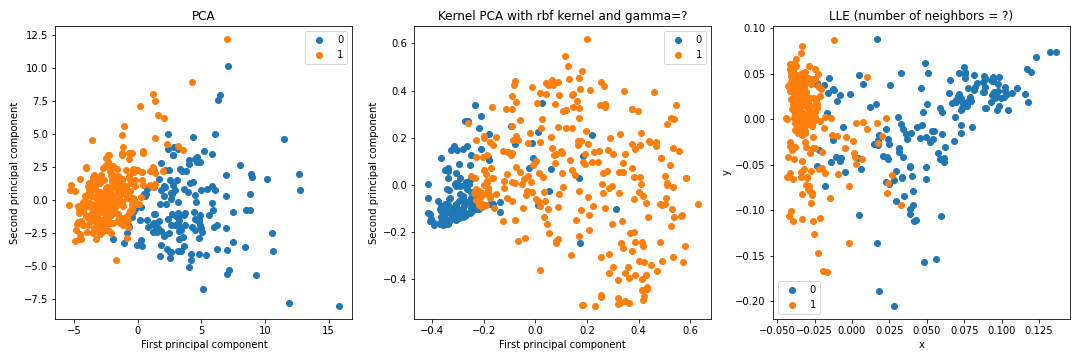

On the left, it is standard PCA. In the middle, it is kernel PCA. You should use RBF kernel for this assignment and select a good hyperparameter on your own. On the right, you will implement LLE. Similarly, you should select the number of neighborhoods.

**To simplify your code, you do not need to show how you find the hyperparameter.** However, you should include your choices in your visualization, see my sample plots. Moreover, you should include all visualizations in one Figure using subplots. You should add informative labels, legends, and titles to make your plots clear.  

Your plots will be different from my sample plots due to the different hyperparameters and random train-test split. But the layout (plot labels, lengends, and etc) should be similar.


#### Grading policy:
1. You should implement each algorithm correctly. (5 pts each) 
2. You do not need to write a function for this part, but you should add inline comments to explain each step. (5 pts)
3. Visualization is clear and meets the requirements. (5 pts)

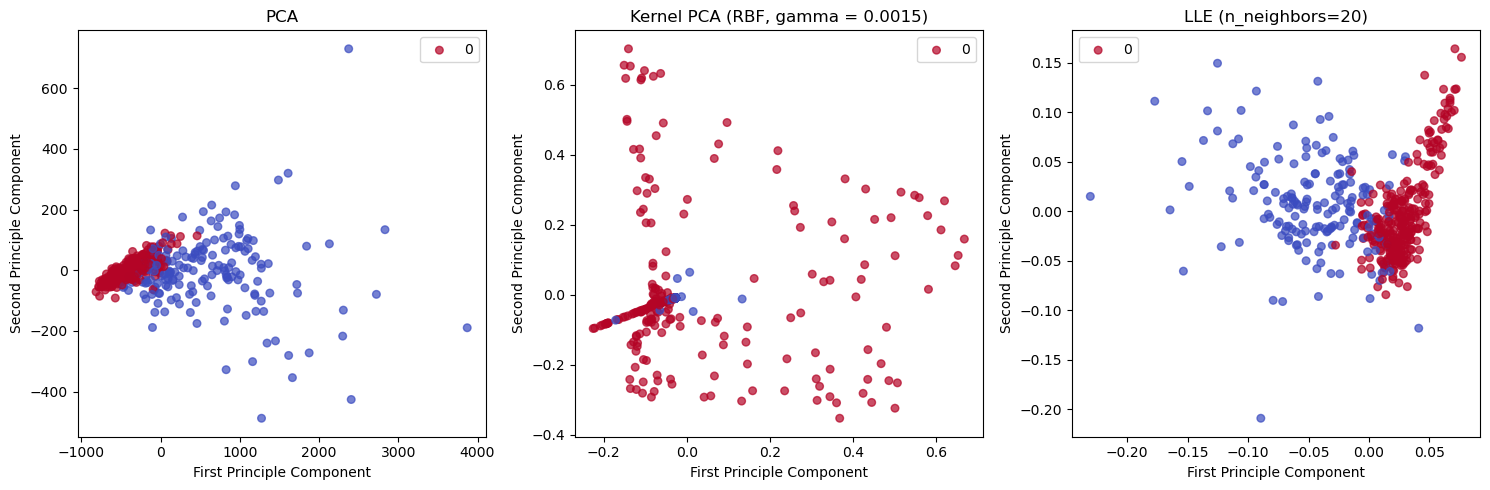

In [4]:
# 1. Standard PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# 2. Kernel PCA with RBF kernel
# Select a good value for gamma through experimentation
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0015)
X_kpca = kernel_pca.fit_transform(X_train)

# 3. Locally Linear Embedding (LLE)
# Choose the number of neighbors based on experimentation
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_lle = lle.fit_transform(X_train)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Standard PCA
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', s=30, alpha=0.7)
axs[0].set_title("PCA")
axs[0].legend(handles=axs[0].collections, labels=[0, 1])

# Plot Kernel PCA
axs[1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='coolwarm', s=30, alpha=0.7)
axs[1].set_title("Kernel PCA (RBF, gamma = 0.0015)")
axs[1].legend(handles=axs[1].collections, labels=[0, 1])

# Plot LLE
axs[2].scatter(X_lle[:, 0], X_lle[:, 1], c=y_train, cmap='coolwarm', s=30, alpha=0.7)
axs[2].set_title("LLE (n_neighbors=20)")
axs[2].legend(handles=axs[2].collections, labels=[0, 1])

# Add general plot labels
for ax in axs:
    ax.set_xlabel("First Principle Component")
    ax.set_ylabel("Second Principle Component")

plt.tight_layout()
plt.show()

## Part 3: Train classification models (50 pts)

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required. (Hints: the reference I provide is in a good shape, but you cannot use the code directly. Slight modification is required. )

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason. (5 pts)

I chose LLE because it provides a clear separation between the classes in the 2D visualization, which can help classification models distinguish between classes more effectively.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [5]:
# Apply LLE for dimension reduction
lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2)  # Adjust n_neighbors if needed
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)  # Transform the test set with the trained LLE

#### 3(c) Write a function to draw decision region (5 pts)

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

**Grading policy:**
1. Function docstring and inline comments are required.
2. The correctness of your function will be checked later.

In [6]:
def plot_decision_regions(model, X, y, feature_names=('Dim 1', 'Dim 2'), class_labels=None, ax=None):
    """
    Plot decision regions for a classification model in 2D feature space.
    
    Parameters:
    - model: Trained model with `.predict` method.
    - X: 2D DataFrame or array-like of features.
    - y: 1D array of labels for the dataset.
    - feature_names: Tuple, names of the features in the plot (default: 'Dim 1', 'Dim 2').
    - class_labels: List of class labels for the legend (default: None).
    - ax: Optional, Matplotlib axis to plot on.
    """
    # Define min/max values for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make predictions on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary using contour plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('lightblue', 'lightgreen', 'pink')))

    # Scatter plot for actual data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(('blue', 'green', 'red')))
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    # Add legend if class labels provided
    if class_labels:
        ax.legend(handles=scatter.legend_elements()[0], labels=class_labels)

#### 3(d) Train k-nearest-neighbors model (10 pts)

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region of the model with the best k.

**Grading policy:** Do the following correctly, then you will receive credits
1. Try different k values and report all test accuracies (5 pts)
2. Select the best k and visualize the decision region (5 pts)

KNN with k=1: Test Accuracy = 0.92
KNN with k=3: Test Accuracy = 0.92
KNN with k=5: Test Accuracy = 0.93
KNN with k=7: Test Accuracy = 0.93
KNN with k=9: Test Accuracy = 0.93


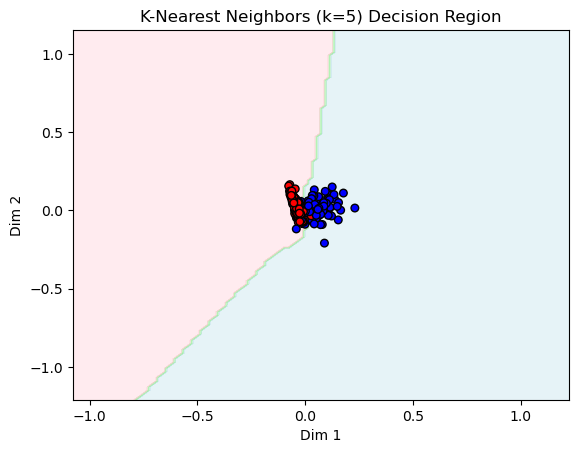

In [7]:
#### Your code here
k_values = [1, 3, 5, 7, 9]
best_k, best_accuracy = 0, 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lle, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test_lle))
    print(f"KNN with k={k}: Test Accuracy = {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_k, best_accuracy = k, accuracy

# Train KNN with best k and plot decision regions
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_lle, y_train)

# Plotting
fig, ax = plt.subplots()
plot_decision_regions(best_knn, X_train_lle, y_train, feature_names=('Dim 1', 'Dim 2'), ax=ax)
ax.set_title(f"K-Nearest Neighbors (k={best_k}) Decision Region")
plt.show()

#### 3(e) Train logistic regression model (5 pts)

No hyperparameter selection required for the logistic regression model. 

**Grading policy:** Do the following correctly, then you will receive credits
1. Train a model, report test accuracy, and visualize the decision region (5 pts)

Logistic Regression Test Accuracy = 0.69


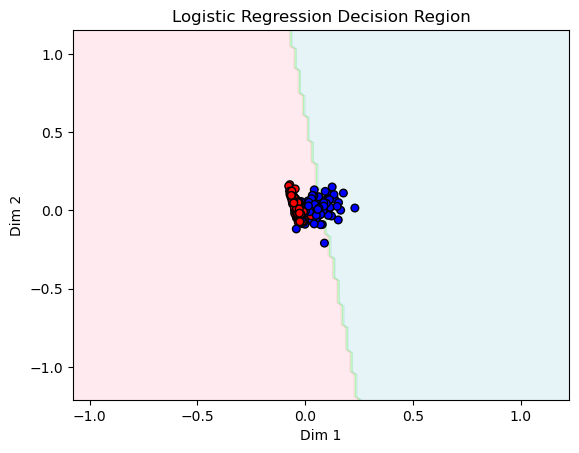

In [8]:
#### Your code here
# Train logistic regression and evaluate
log_reg = LogisticRegression()
log_reg.fit(X_train_lle, y_train)
log_accuracy = accuracy_score(y_test, log_reg.predict(X_test_lle))
print(f"Logistic Regression Test Accuracy = {log_accuracy:.2f}")

# Plotting
fig, ax = plt.subplots()
plot_decision_regions(log_reg, X_train_lle, y_train, feature_names=('Dim 1', 'Dim 2'), ax=ax)
ax.set_title("Logistic Regression Decision Region")
plt.show()

#### 3(f) Train decision tree (10 pts)

You should try different `max_depth` and select the best one.

**Grading policy:** Do the following correctly, then you will receive credits
1. Try different `max_depth` and report all test accuracies (5 pts)
2. Select the best `max_depth` and visualize the decision region (5 pts)

Decision Tree with max_depth=3: Test Accuracy = 0.94
Decision Tree with max_depth=5: Test Accuracy = 0.94
Decision Tree with max_depth=7: Test Accuracy = 0.96
Decision Tree with max_depth=9: Test Accuracy = 0.93


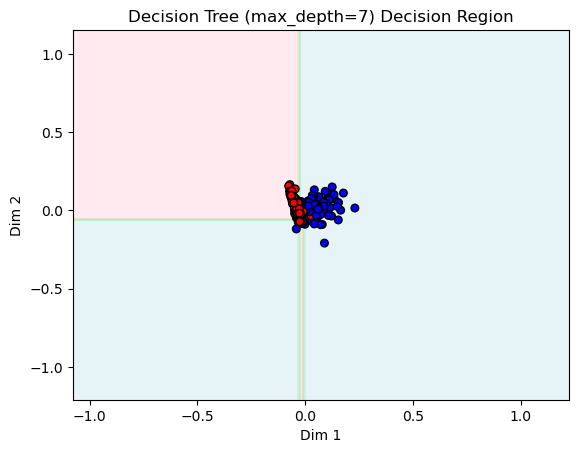

In [9]:
#### Your code here
# Tune max_depth in Decision Tree
depth_values = [3, 5, 7, 9]
best_depth, best_accuracy = 0, 0
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_lle, y_train)
    accuracy = accuracy_score(y_test, dt.predict(X_test_lle))
    print(f"Decision Tree with max_depth={depth}: Test Accuracy = {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_depth, best_accuracy = depth, accuracy

# Train Decision Tree with best depth and plot decision region
best_dt = DecisionTreeClassifier(max_depth=best_depth)
best_dt.fit(X_train_lle, y_train)

# Plotting
fig, ax = plt.subplots()
plot_decision_regions(best_dt, X_train_lle, y_train, feature_names=('Dim 1', 'Dim 2'), ax=ax)
ax.set_title(f"Decision Tree (max_depth={best_depth}) Decision Region")
plt.show()

#### 3(g) Train random forest (10 pts)

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

**Grading policy:** Do the following correctly, then you will receive credits
1. Try different `max_depth` and `n_estimators`, then report all test accuracies (5 pts)
2. Select the best `max_depth` and `n_estimators`, then visualize the decision region (5 pts)

Random Forest with max_depth=5, n_estimators=50: Test Accuracy = 0.94
Random Forest with max_depth=5, n_estimators=100: Test Accuracy = 0.94
Random Forest with max_depth=10, n_estimators=50: Test Accuracy = 0.95
Random Forest with max_depth=10, n_estimators=100: Test Accuracy = 0.95


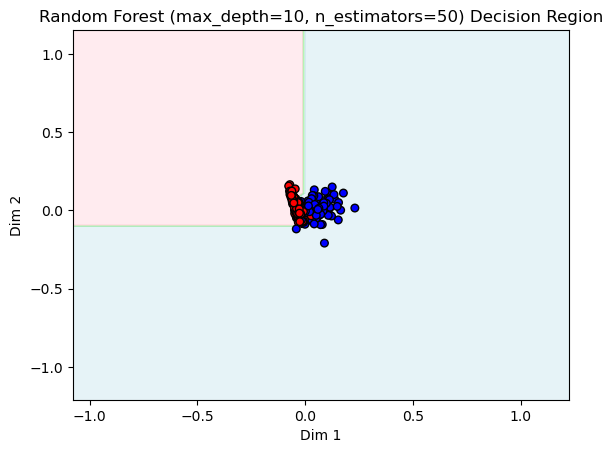

In [10]:
#### Your code here
# Tune max_depth and n_estimators in Random Forest
forest_depth_values = [5, 10]
n_estimators_values = [50, 100]
best_depth, best_n_estimators, best_accuracy = 0, 0, 0
for depth in forest_depth_values:
    for n_estimators in n_estimators_values:
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=42)
        rf.fit(X_train_lle, y_train)
        accuracy = accuracy_score(y_test, rf.predict(X_test_lle))
        print(f"Random Forest with max_depth={depth}, n_estimators={n_estimators}: Test Accuracy = {accuracy:.2f}")
        if accuracy > best_accuracy:
            best_depth, best_n_estimators, best_accuracy = depth, n_estimators, accuracy

# Train Random Forest with best parameters and plot decision region
best_rf = RandomForestClassifier(max_depth=best_depth, n_estimators=best_n_estimators, random_state=42)
best_rf.fit(X_train_lle, y_train)

# Plotting
fig, ax = plt.subplots()
plot_decision_regions(best_rf, X_train_lle, y_train, feature_names=('Dim 1', 'Dim 2'), ax=ax)
ax.set_title(f"Random Forest (max_depth={best_depth}, n_estimators={best_n_estimators}) Decision Region")
plt.show()

#### 3(h) Train max voting classifier (5 pts)

You should use the hyperparameters you select before. 

**Grading policy:** Do the following correctly, then you will receive credits
1. Train a model, report test accuracy, and visualize the decision region (5 pts)

Voting Classifier Test Accuracy = 0.95


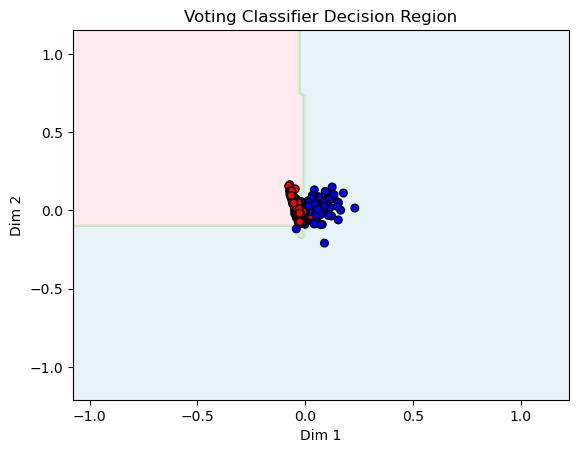

In [11]:
#### Your code here
# Define the best models as a voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('knn', best_knn), 
    ('log_reg', log_reg), 
    ('dt', best_dt),
    ('rf', best_rf)
])
voting_clf.fit(X_train_lle, y_train)
voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test_lle))
print(f"Voting Classifier Test Accuracy = {voting_accuracy:.2f}")

# Plotting
fig, ax = plt.subplots()
plot_decision_regions(voting_clf, X_train_lle, y_train, feature_names=('Dim 1', 'Dim 2'), ax=ax)
ax.set_title("Voting Classifier Decision Region")
plt.show()